
**Analyzing Used Car Market Trends**

In this project, we aim to gain insights into the trends and characterstics of the used car market. By analyzing various factors in pricing, transmission type, cylinder counts, car types, condition, relationship between age and odomter readings. In order to understand the how these influence the customer and the market

**Key Questions**

*Pricing Trends:*
- What is the distribution of car prices in our inventory?
- How does the price range vary across different categories and conditions?

*Transmission Preferences:* 

- What is the proportion of automatic versus manual transmissions in our stock?
-Are there notable differences in pricing based on transmission type?

*Cylinder Type:*

-How are cars distributed among various cylinder counts?
-Does the cylinder count impact pricing, and if so, how?

*Car Type Popularity:*

-Which car types (SUVs, sedans, pickups) are most popular among buyers?
-Are there pricing variations based on the type of car?

*Condition Classification:*

-What percentage of our inventory falls under the 'good' condition category?
-How does condition classification correlate with pricing?

*Age and Odometer Relationships:*

-What is the relationship between a car's age, odometer reading, and pricing?
-How do older cars with higher odometer readings compare in terms of costs?

*Pricing Trends:*

-How do car prices evolve as vehicles age, and what role does odometer reading play?

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
#import data from csv
vehicles_df = pd.read_csv('../vehicles_us.csv')

In [4]:
#view data
print(vehicles_df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


In [5]:
#view info of datafram
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
#checking for duplicates
vehicles_df.duplicated().sum()

0

In [7]:
#checking for na.. 
vehicles_df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
#change price to float with 2 decimals
vehicles_df['price'] = vehicles_df['price'].astype(float).round(2) 

In [9]:
#drop outlier prices
vehicles_df = vehicles_df.drop(vehicles_df[vehicles_df['price'] > 75000].index)

In [10]:
#drop model year rows where data is missing. 
vehicles_df = vehicles_df.dropna(subset='model_year')

In [11]:
#drop model_years < 1958 .. data is outlier info and possible incorrect
vehicles_df = vehicles_df.drop(vehicles_df[vehicles_df['model_year'] < 1958 ].index)

In [12]:
#format model_year column for year datetime 
vehicles_df['model_year'] =  pd.to_datetime(vehicles_df['model_year'],format='%Y').dt.year

In [13]:
#split model column into make and model. 
vehicles_df[['make','model']] = vehicles_df['model'].str.split(' ',n=1, expand=True)
vehicles_df.insert(2, 'make', vehicles_df.pop('make'))


In [14]:
#paint_color column - replace Nan with "unkown" to fix data
vehicles_df['paint_color'].fillna(value="unknown", inplace=True) 

In [15]:
#fill NaN value to 0 in is_4wd column
vehicles_df['is_4wd'].fillna(value=0, inplace=True) 

In [16]:
#change is_4wd to int
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].astype(int) 

In [17]:
#make date_posted a datetime value
vehicles_df['date_posted'] = pd.to_datetime(vehicles_df.date_posted)

In [18]:
#create DF of cars and there cylinders
model_cylinders_df = vehicles_df.groupby(['model_year','make','model','type','cylinders']).size().reset_index() #   [['model_year', 'make', 'model', 'type','cylinders']]

In [19]:
#create dictionary of cars and there cylinders 
cylinders_mapping = model_cylinders_df.set_index(['model_year', 'make', 'model', 'type'])['cylinders'].to_dict()


In [20]:
#replace missing cylinders from the cylinder dictionary
vehicles_df.loc[:, 'cylinders'] = vehicles_df.apply(lambda row: cylinders_mapping.get((row['model_year'],row['make'], row['model'], row['type']), row['cylinders']) if pd.isna(row['cylinders']) else row['cylinders'], axis=1)


In [21]:
#check if any remaining null data in cylinders
vehicles_df.isna().sum()

price              0
model_year         0
make               0
model              0
condition          0
cylinders        116
fuel               0
odometer        7337
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [22]:
#drop remaining rows with no cylinder info 
vehicles_df = vehicles_df.dropna(subset='cylinders')

In [23]:
#convert cylinders column to an interger
vehicles_df['cylinders'] = vehicles_df['cylinders'].round().astype(int)

In [24]:
vehicles_df.isna().sum()

price              0
model_year         0
make               0
model              0
condition          0
cylinders          0
fuel               0
odometer        7312
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [25]:
#create DF of odometer mean values
odometer_mean_df= vehicles_df.groupby(['model_year','make','model'])['odometer'].mean().round().reset_index()    #'cylinders','transmission'

In [26]:
#create a mapping disctionary of odometer values
odometer_mapping = odometer_mean_df.set_index(['model_year', 'make', 'model'])['odometer'].to_dict()    #,'cylinders','transmission'

In [27]:
#apply odometer mean values to missing odometer  
vehicles_df.loc[:, 'odometer'] = vehicles_df.apply(lambda row: odometer_mapping.get((row['model_year'],row['make'], row['model']), row['odometer']) if pd.isna(row['odometer']) else row['odometer'], axis=1)   


In [28]:
#view missing values
vehicles_df.isna().sum()

price            0
model_year       0
make             0
model            0
condition        0
cylinders        0
fuel             0
odometer        69
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
dtype: int64

In [29]:
#drop remaining rows with no odometer info 
vehicles_df = vehicles_df.dropna(subset='odometer')

In [30]:
#change transmission value 'other' to 'manual' to fix data 
vehicles_df['transmission'] = vehicles_df['transmission'].replace({'other':'manual'})

In [31]:
#check data 
vehicles_df.isna().sum()

price           0
model_year      0
make            0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [32]:
#view data
vehicles_df.head()

,price,model_year,make,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw,x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
2,5500.0,2013,hyundai,sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500.0,2003,ford,f-150,fair,8,gas,175166.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900.0,2017,chrysler,200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990.0,2014,chrysler,300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15


**Histogram of Model Year by the condition of the vehicles.**

- The majority of our inventory has been classified as being in good condition.

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


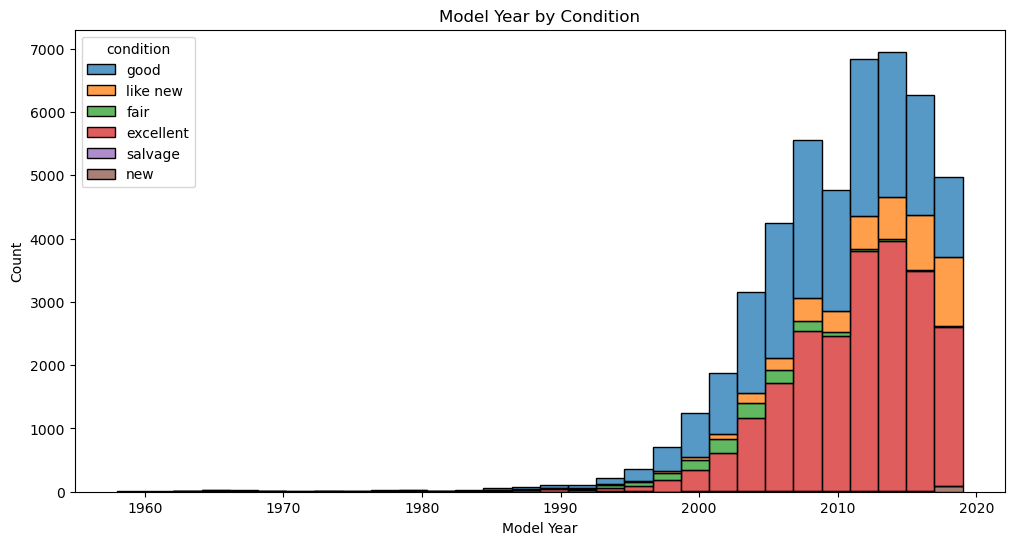

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(data=vehicles_df, x='model_year', hue='condition', multiple='stack', bins=30)
plt.title('Model Year by Condition')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

**Histogram of Price by Transmission Type**

- Automatic transmission is the prevailing choice over manual.


c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


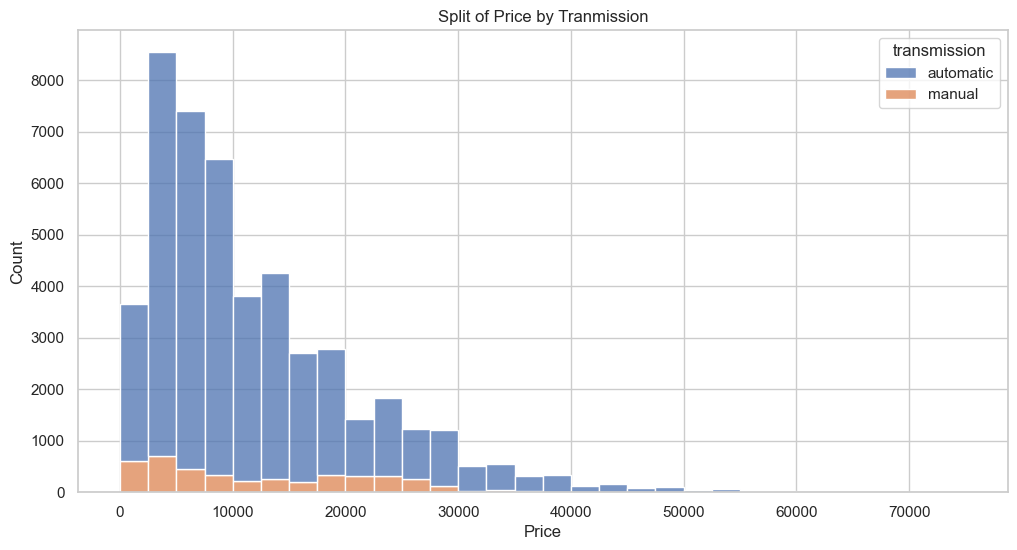

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(data=vehicles_df, x='price', hue='transmission', multiple='stack', bins=30)
plt.title('Split of Price by Tranmission')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Histogram of Price by Cylinders**

- Vehicles with 8, 6, or 4 cylinders dominate, with the 6-cylinder category being the most prominent.

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


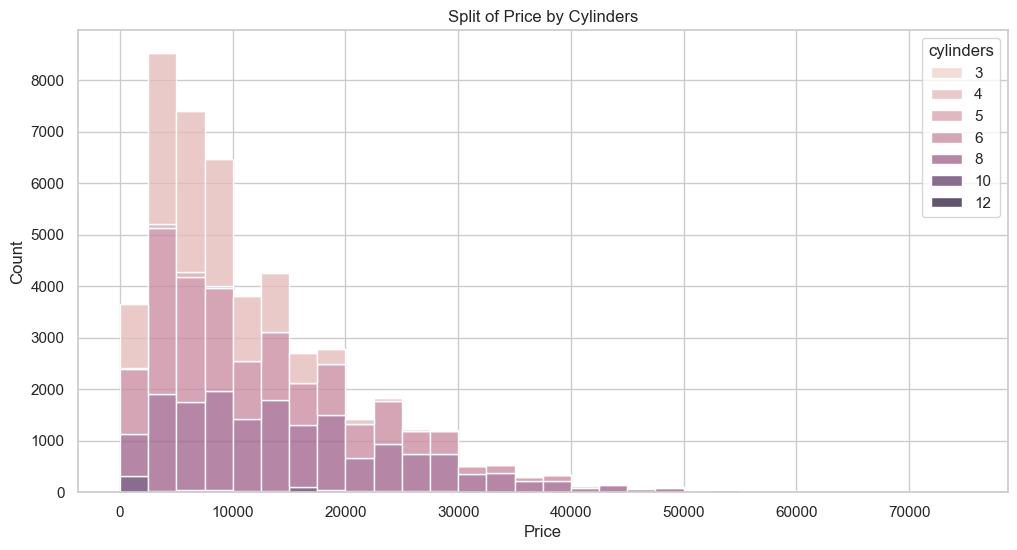

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(data=vehicles_df, x='price', hue='cylinders', multiple='stack', bins=30)
plt.title('Split of Price by Cylinders')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Histogram of Price by Cylinders**

- SUVs rank as the most popular car type, closely followed by sedans and pickups.

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


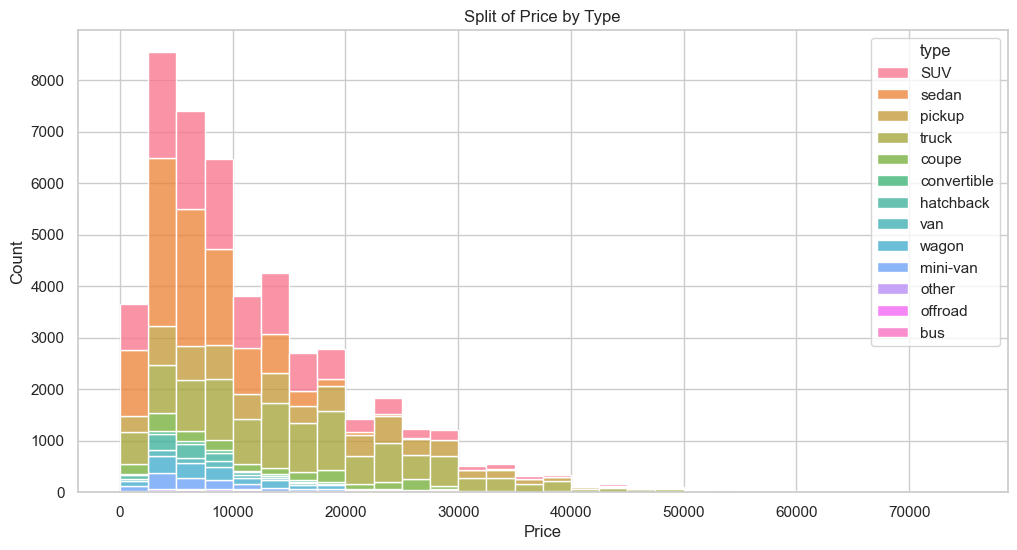

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(data=vehicles_df, x='price', hue='type', multiple='stack', bins=30)
plt.title('Split of Price by Type')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Create line chart comparing prices by their model year.**

- As cars age, their prices generally decrease until reaching classic status

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


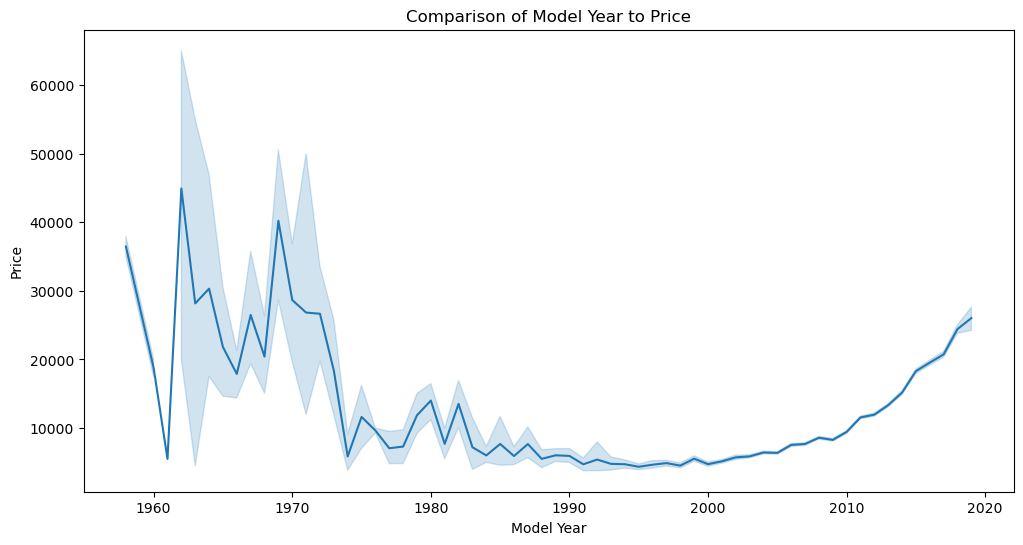

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=vehicles_df, x='model_year', y='price')
plt.title('Comparison of Model Year to Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

**Scatter Plot: Price vs Odometer, Grouped by Car Age**

- As vehicles surpass the 5-year mark, those with higher odometer readings tend to exhibit lower costs.

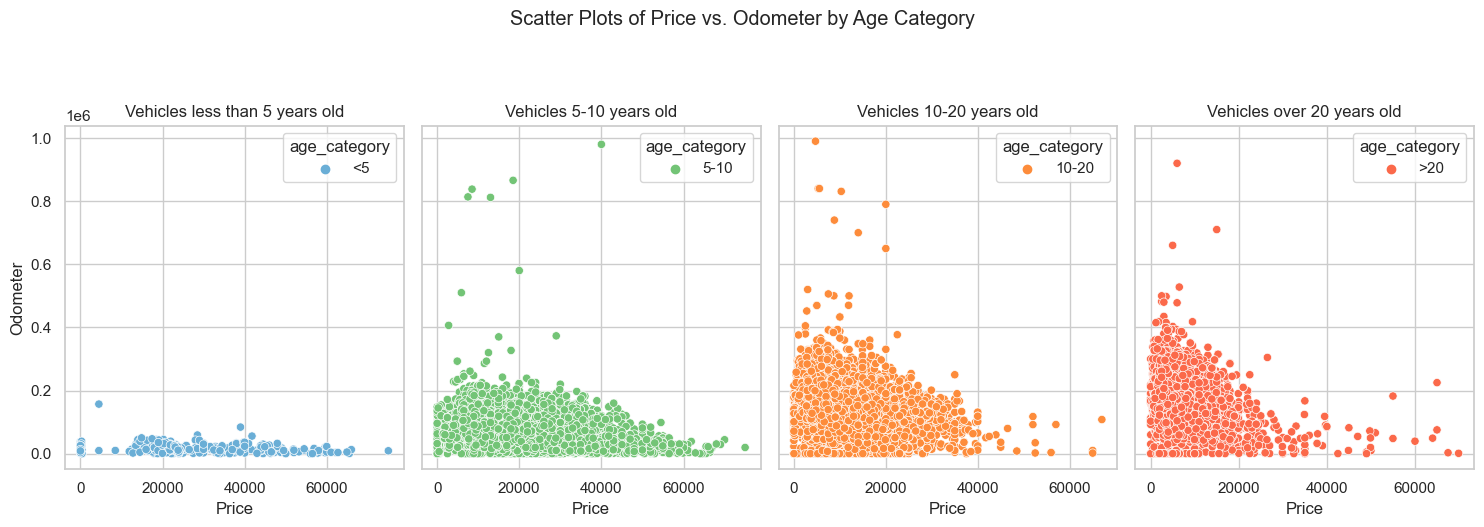

In [52]:
#create new temp vehicles df with new columns age and age_category
vehicles_temp_df = vehicles_df

#get number of years and put into age column
vehicles_temp_df['age']=2023-vehicles_temp_df['model_year']

#function to get the category to fill off of 'age' 
def age_category(x):
    if x < 5: return '<5'
    elif x >= 5 and x < 10: return '5-10'
    elif x >= 10 and x < 20: return '10-20'
    else: return '>20'

#create new column in df for the age category calling the age_category function
vehicles_temp_df['age_category'] =  vehicles_temp_df['age'].apply(age_category)


#Create Scatter plot graphs off of the 'age_category' 
 
sns.set(style="whitegrid")
# Create a figure and a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

# Scatter plot 1
sns.scatterplot(ax=axes[0], data=vehicles_temp_df[vehicles_temp_df['age_category'] == '<5'], x='price', y='odometer', hue='age_category', palette='Blues')
axes[0].set_title('Vehicles less than 5 years old')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Odometer')

# Scatter plot 2
sns.scatterplot(ax=axes[1], data=vehicles_temp_df[vehicles_temp_df['age_category'] == '5-10'], x='price', y='odometer', hue='age_category',palette='Greens')
axes[1].set_title('Vehicles 5-10 years old')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Odometer')

# Scatter plot 3
sns.scatterplot(ax=axes[2], data=vehicles_temp_df[vehicles_temp_df['age_category'] == '10-20'], x='price', y='odometer', hue='age_category',palette='Oranges')
axes[2].set_title('Vehicles 10-20 years old')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Odometer')

# Scatter plot 4
sns.scatterplot(ax=axes[3], data=vehicles_temp_df[vehicles_temp_df['age_category'] == '>20'], x='price', y='odometer', hue='age_category', palette='Reds')
axes[3].set_title('Vehicles over 20 years old')
axes[3].set_xlabel('Price')
axes[3].set_ylabel('Odometer')

#create title for all 4 charts
plt.suptitle('Scatter Plots of Price vs. Odometer by Age Category', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()




**CHart of  car types available by their manufacturer**
- Ford has our largest inventory of used vehicles

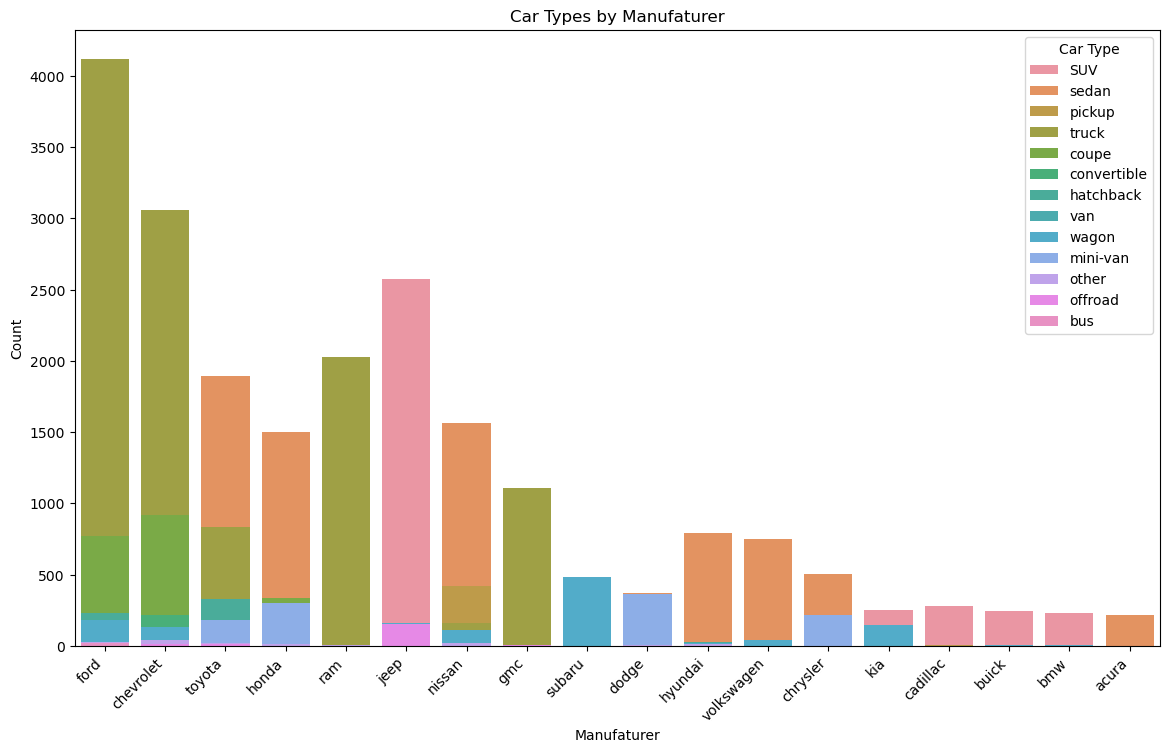

In [35]:
plt.figure(figsize=(14, 8))
sns.countplot(data=vehicles_df,x='make', hue='type', order=vehicles_df['make'].value_counts().index, dodge=False)
plt.title('Car Types by Manufaturer')
plt.xlabel('Manufaturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Type')
plt.show()

**Bar Chart on how many cars available by color**
- Our largest inventory color is White

<function matplotlib.pyplot.show(close=None, block=None)>

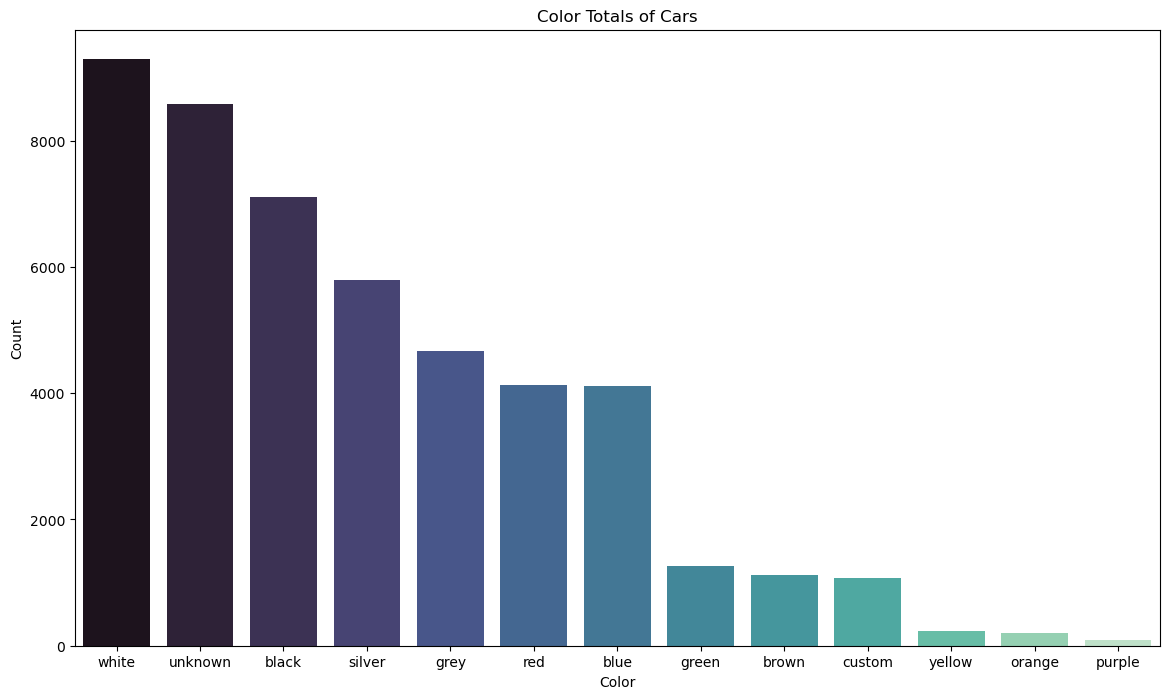

In [291]:

plt.figure(figsize=(14,8))
sns.countplot(data=vehicles_df,x='paint_color', order=vehicles_df['paint_color'].value_counts().index, palette='mako')
plt.title('Color Totals of Cars')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show


In [36]:
#save new DataFrame with fixed data for use in the app
vehicles_df.to_csv("../vehicles_new_df.csv")


**Final Conculsions:**

1. Our inventory predominantly consists of vehicles priced between 5K and 10K.
2. Automatic transmission is the preferred choice over manual among our customers.
3. Cars equipped with 8, 6, or 4 cylinders dominate our stock, with 6-cylinder models being particularly popular.
4. SUVs stand out as the top choice, closely followed by sedans and pickups.
5. The majority of our vehicles are classified as being in good condition.
6. As vehicles age beyond 5 years, those with higher odometer readings tend to have lower costs.
7. Over time, car prices generally decrease until they achieve classic status.
8. We have more white colored Cars, followed by black cars 